In [25]:
from module_hobin import stationarity_adf_test, stationarity_kpss_test
import pandas as pd
%reload_ext autoreload
%autoreload 2

In [2]:
def stationarity_adf_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data)[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data)[4].items():
            Stationarity_adf['Critical Value(%s)' % key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data)[
                5]
            Stationarity_adf = pd.DataFrame(
                Stationarity_adf, columns=['Stationarity_adf'])
    else:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data[Target_name])[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data[Target_name])[4].items():
            Stationarity_adf['Critical Value(%s)' % key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(
                Y_Data[Target_name])[5]
            Stationarity_adf = pd.DataFrame(
                Stationarity_adf, columns=['Stationarity_adf'])
    return Stationarity_adf


def stationarity_kpss_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data)[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data)[3].items():
            Stationarity_kpss['Critical Value(%s)' % key] = value
            Stationarity_kpss = pd.DataFrame(
                Stationarity_kpss, columns=['Stationarity_kpss'])
    else:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data[Target_name])[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data[Target_name])[3].items():
            Stationarity_kpss['Critical Value(%s)' % key] = value
            Stationarity_kpss = pd.DataFrame(
                Stationarity_kpss, columns=['Stationarity_kpss'])
    return Stationarity_kpss

# 정상성 변환

## CO2 농도 추세 제거

In [3]:
[dataset for dataset in dir(sm.datasets) if not dataset.startswith('_')]

['PytestTester',
 'anes96',
 'cancer',
 'ccard',
 'check_internet',
 'china_smoking',
 'clear_data_home',
 'co2',
 'committee',
 'copper',
 'cpunish',
 'elnino',
 'engel',
 'fair',
 'fertility',
 'get_data_home',
 'get_rdataset',
 'grunfeld',
 'heart',
 'interest_inflation',
 'longley',
 'macrodata',
 'modechoice',
 'nile',
 'randhie',
 'scotland',
 'spector',
 'stackloss',
 'star98',
 'statecrime',
 'strikes',
 'sunspots',
 'test',
 'utils',
 'webuse']

In [4]:
raw_set = sm.datasets.co2.load_pandas()
raw = raw_set.data
raw

,co2
1958-03-29,316.10
1958-04-05,317.30
1958-04-12,317.60
1958-04-19,317.50
1958-04-26,316.40
...,...
2001-12-01,370.30
2001-12-08,370.80
2001-12-15,371.20
2001-12-22,371.30


In [5]:
raw_set = sm.datasets.get_rdataset("co2", package="datasets")
raw = raw_set.data
raw

,time,value
0,"1,959.00",315.42
1,"1,959.08",316.31
2,"1,959.17",316.50
3,"1,959.25",317.56
4,"1,959.33",318.13
...,...,...
463,"1,997.58",362.57
464,"1,997.67",360.24
465,"1,997.75",360.83
466,"1,997.83",362.49


,time,value
0,"1,959.00",315.42
1,"1,959.08",316.31
2,"1,959.17",316.50
3,"1,959.25",317.56
4,"1,959.33",318.13


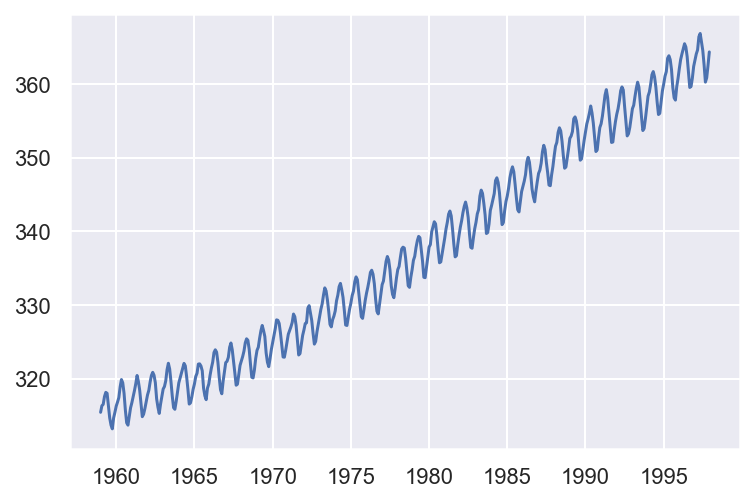

In [6]:
display(raw.head())
plt.plot(raw.time, raw.value)
plt.show()

In [7]:
result = sm.OLS.from_formula(formula='value~time', data=raw).fit()
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.479e+04
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:33:11   Log-Likelihood:                -1113.5
No. Observations:                 468   AIC:                             2231.
Df Residuals:                     466   BIC:                             2239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2249.7742     21.268   -105.784      0.000   -2291.566   -2207.982
time           1.3075      0.011    121.634      0.000       1.286       1.329
==============================================================================
Omnibus:                       15.857   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.798
Skew:                           0.048   Prob(JB):                       0.0203
Kurtosis:                       2.375   Cond. No.                     3.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
result.params

Intercept   -2,249.77
time             1.31
dtype: float64

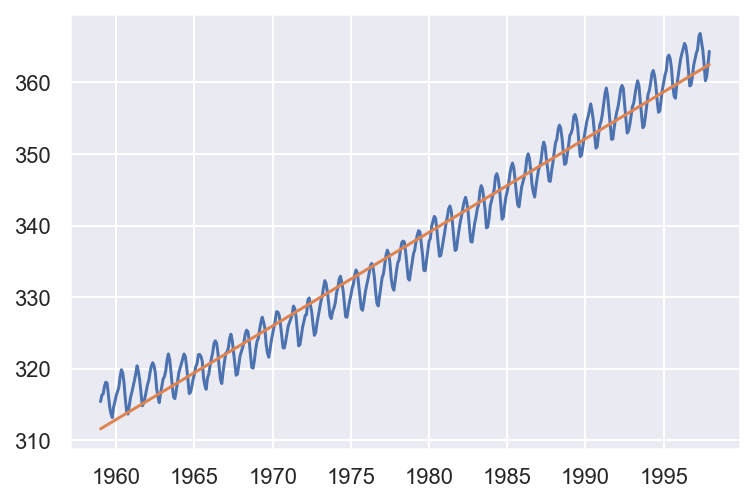

In [9]:
# 추세추정
trend = result.params[0] + result.params[1]*raw.time
plt.plot(raw.time, raw.value, raw.time, trend)
plt.show()

,time,value
0,"1,959.00",315.42
1,"1,959.08",316.31
2,"1,959.17",316.50
3,"1,959.25",317.56
4,"1,959.33",318.13


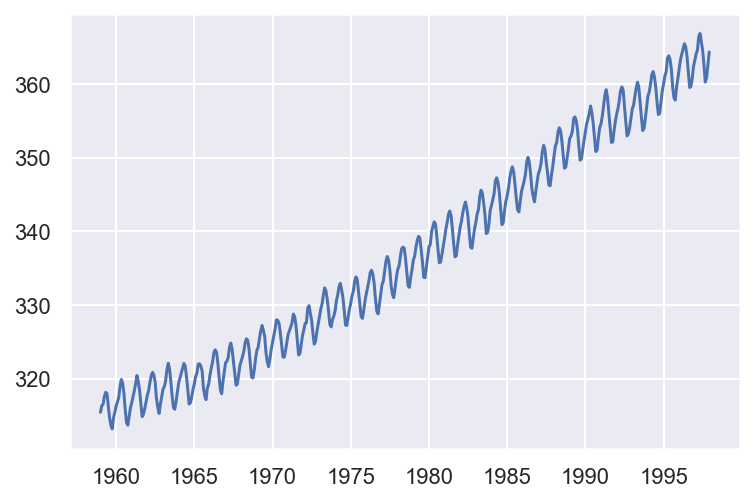

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        00:54:16   Log-Likelihood:                -1027.8
No. Observations:                 468   AIC:                             2062.
Df Residuals:                     465   BIC:                             2074.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.77e+04   3482.902     13.696      0.000    4.09e+04    5.45e+04
time           -49.1907      3.521    -13.971      0.000     -56.110     -42.272
I(time ** 2)     0.0128      0.001     14.342      0.000       0.011       0.015
==============================================================================
Omnibus:                       66.659   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.850
Skew:                          -0.116   Prob(JB):                     0.000133
Kurtosis:                       2.072   Cond. No.                     1.35e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

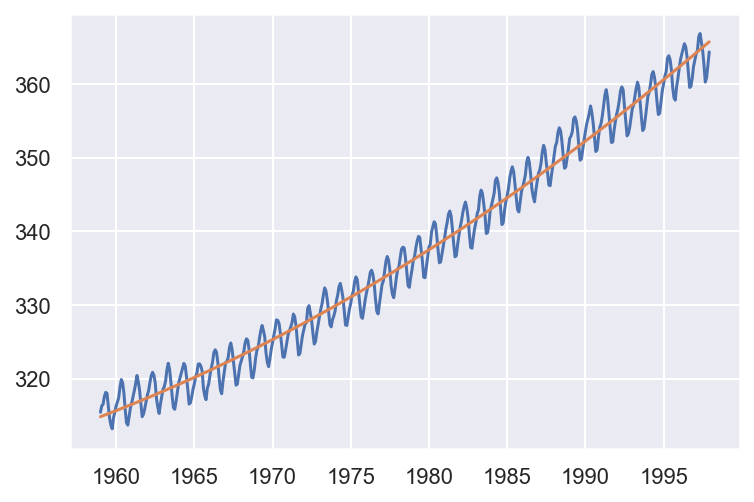

In [12]:
# 데이터 확인 및 추세 추정 (비선형)
display(raw.head())
plt.plot(raw.time, raw.value)
plt.show()

result = sm.OLS.from_formula(formula='value~time+I(time**2)', data=raw).fit()
display(result.summary())

trend = result.params[0] + result.params[1] * \
    raw.time + result.params[2]*(raw.time**2)
plt.plot(raw.time, raw.value, raw.time, trend)
plt.show()

In [11]:
result.resid

0      0.59
1      1.42
2      1.54
3      2.53
4      3.03
       ... 
463   -2.54
464   -5.02
465   -4.58
466   -3.07
467   -1.37
Length: 468, dtype: float64

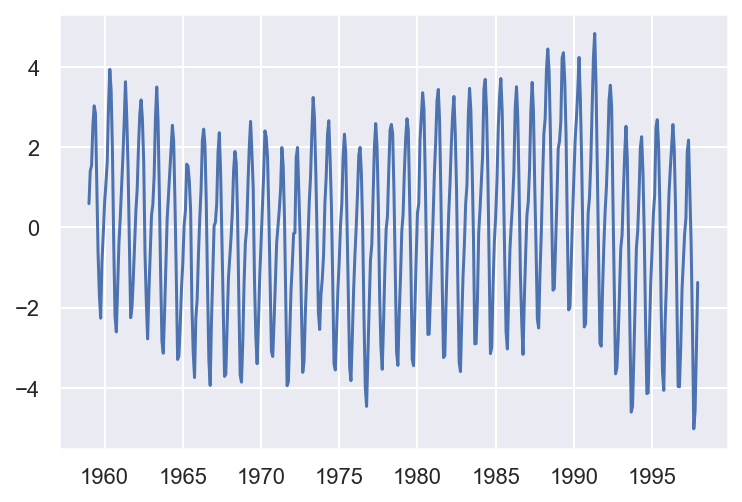

In [12]:
# 추세 제거 및 정상성 확인
# 방법1
plt.plot(raw.time, result.resid)
plt.show()

In [13]:
stationarity_adf_test(result.resid, []).iloc[1, :].values[0] > 0.5

False

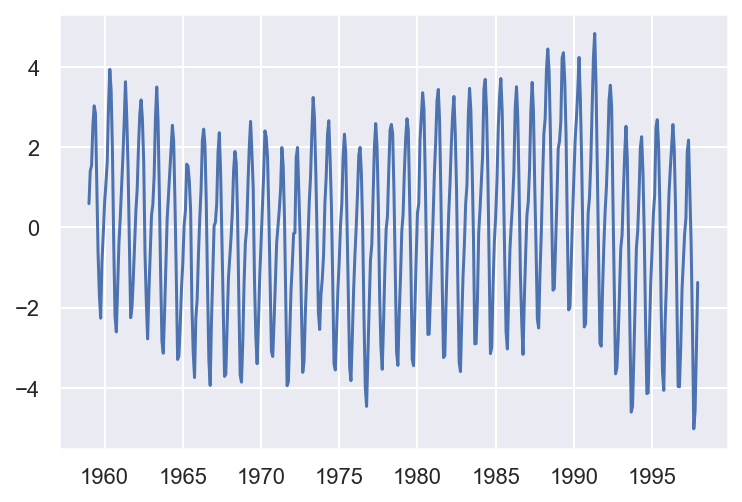

ADF:추세가 어느정도 남아있어 귀무가설(비정상) 기각 못합니다.


,Stationarity_adf
Test Statistics,-2.53
p-value,0.11
Used Lag,13.00
Used Observations,454.00
Critical Value(1%),-3.44
Maximum Information Criteria,260.10


KPSS:계절성이 어느정도 제거되어 귀무가설(정상) 기각 못합니다.


,Stationarity_kpss
Test Statistics,0.17
p-value,0.10
Used Lag,18.00
Critical Value(10%),0.35


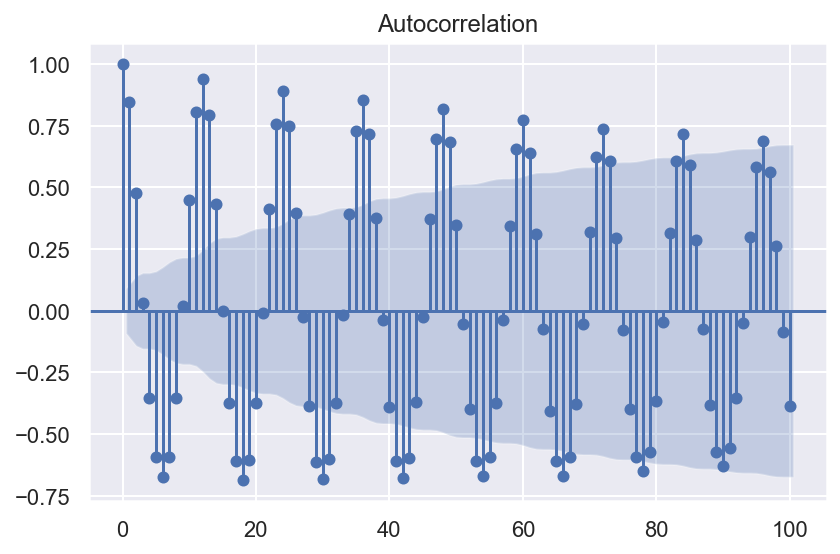

In [26]:
plt.plot(raw.time, result.resid)
plt.show()

display(stationarity_adf_test(result.resid, []))
display(stationarity_kpss_test(result.resid, []))

sm.tsa.graphics.plot_acf(result.resid, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

In [27]:
raw.value.diff(1)

0       NaN
1      0.89
2      0.19
3      1.06
4      0.57
       ... 
463   -1.95
464   -2.33
465    0.59
466    1.66
467    1.85
Name: value, Length: 468, dtype: float64

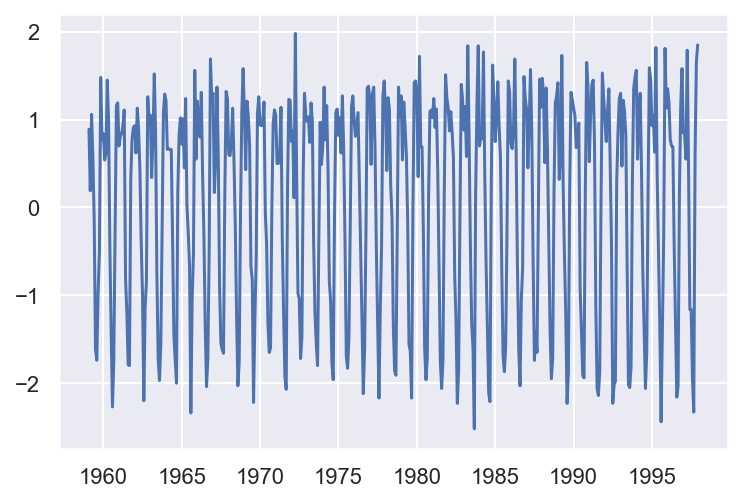

ADF:추세가 어느정도 제거되어 귀무가설(비정상)을 기각합니다.


,Stationarity_adf
Test Statistics,-5.14
p-value,0.00
Used Lag,12.00
Used Observations,454.00
Critical Value(1%),-3.44
Maximum Information Criteria,271.87


KPSS:계절성이 어느정도 제거되어 귀무가설(정상) 기각 못합니다.


,Stationarity_kpss
Test Statistics,0.04
p-value,0.10
Used Lag,18.00
Critical Value(10%),0.35


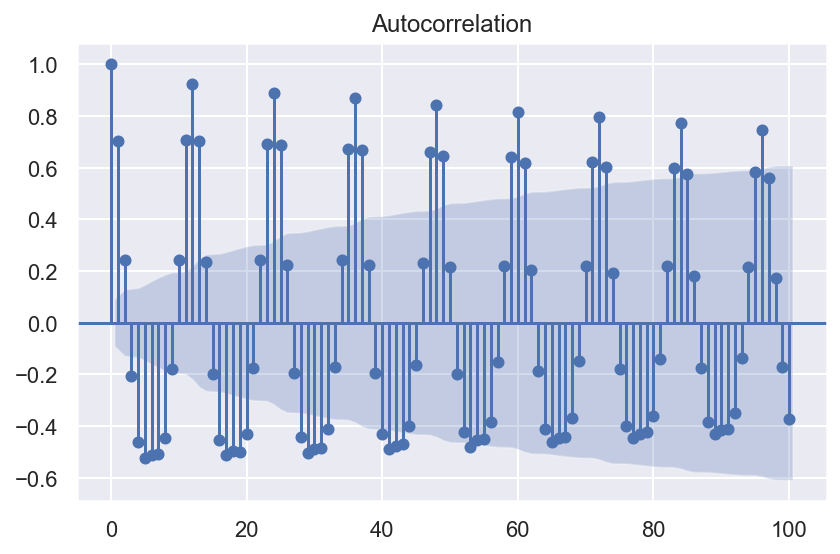

In [28]:
# 추세 제거 및 정상성 확인
# 방법2

plt.plot(raw.time[1:], raw.value.diff(1).dropna())
plt.show()

display(stationarity_adf_test(raw.value.diff(1).dropna(), []))
display(stationarity_kpss_test(raw.value.diff(1).dropna(), []))

sm.graphics.tsa.plot_acf(raw.value.diff(1).dropna(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

## 호흡기질환 사망자수 계절성 제거

In [29]:
raw_set = sm.datasets.get_rdataset('deaths', 'MASS')
raw = raw_set.data
raw

,time,value
0,"1,974.00",3035
1,"1,974.08",2552
2,"1,974.17",2704
3,"1,974.25",2554
4,"1,974.33",2014
...,...,...
67,"1,979.58",1354
68,"1,979.67",1333
69,"1,979.75",1492
70,"1,979.83",1781


- float값을 실제 datetime 값으로 변환

In [31]:
raw.time = pd.date_range('1974-01-01', periods=len(raw), freq='M')
raw

,time,value
0,1974-01-31,3035
1,1974-02-28,2552
2,1974-03-31,2704
3,1974-04-30,2554
4,1974-05-31,2014
...,...,...
67,1979-08-31,1354
68,1979-09-30,1333
69,1979-10-31,1492
70,1979-11-30,1781


In [32]:
raw['month'] = raw.time.dt.month
raw

,time,value,month
0,1974-01-31,3035,1
1,1974-02-28,2552,2
2,1974-03-31,2704,3
3,1974-04-30,2554,4
4,1974-05-31,2014,5
...,...,...,...
67,1979-08-31,1354,8
68,1979-09-30,1333,9
69,1979-10-31,1492,10
70,1979-11-30,1781,11


,time,value,month
67,1979-08-31,1354,8
68,1979-09-30,1333,9
69,1979-10-31,1492,10
70,1979-11-30,1781,11
71,1979-12-31,1915,12


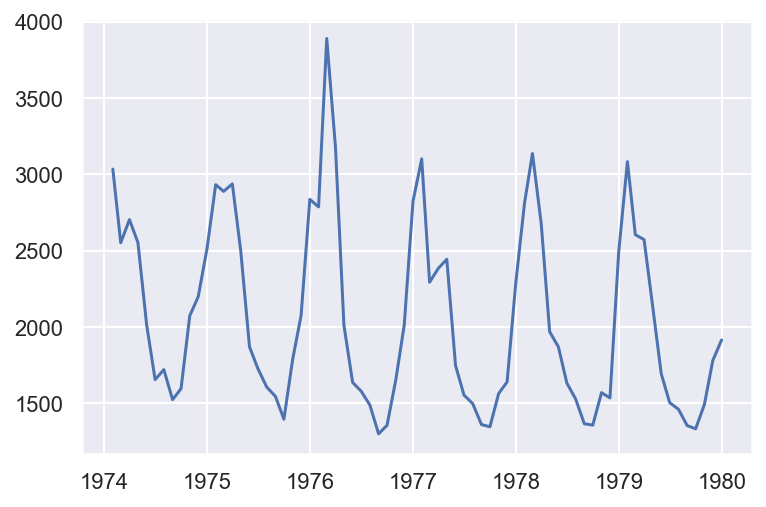

ADF:추세가 어느정도 남아있어 귀무가설(비정상) 기각 못합니다.


,Stationarity_adf
Test Statistics,-0.57
p-value,0.88
Used Lag,12.00
Used Observations,59.00
Critical Value(1%),-3.55
Maximum Information Criteria,841.38


KPSS:계절성이 어느정도 남아있어 귀무가설(정상)을 기각합니다.


,Stationarity_kpss
Test Statistics,0.65
p-value,0.02
Used Lag,12.00
Critical Value(10%),0.35


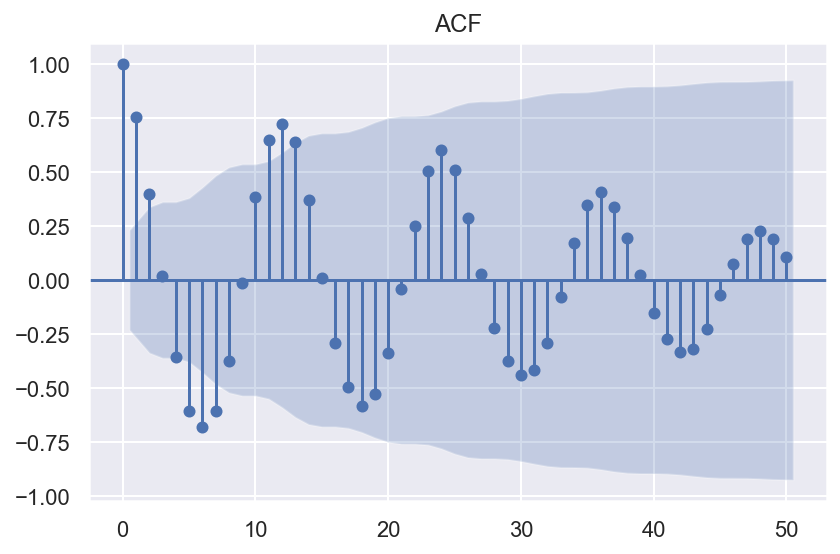

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.66
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           6.55e-21
Time:                        16:40:20   Log-Likelihood:                -494.38
No. Observations:                  72   AIC:                             1013.
Df Residuals:                      60   BIC:                             1040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2959.3333    103.831     28.502      0.000    2751.641    3167.025
C(month)[2]   2894.6667    103.831     27.879      0.000    2686.975    3102.359
C(month)[3]   2743.0000    103.831     26.418      0.000    2535.308    2950.692
C(month)[4]   2269.6667    103.831     21.859      0.000    2061.975    2477.359
C(month)[5]   1805.1667    103.831     17.386      0.000    1597.475    2012.859
C(month)[6]   1608.6667    103.831     15.493      0.000    1400.975    1816.359
C(month)[7]   1550.8333    103.831     14.936      0.000    1343.141    1758.525
C(month)[8]   1408.3333    103.831     13.564      0.000    1200.641    1616.025
C(month)[9]   1397.3333    103.831     13.458      0.000    1189.641    1605.025
C(month)[10]  1690.0000    103.831     16.277      0.000    1482.308    1897.692
C(month)[11]  1874.0000    103.831     18.049      0.000    1666.308    2081.692
C(month)[12]  2478.5000    103.831     23.871      0.000    2270.808    2686.192
==============================================================================
Omnibus:                       19.630   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.630
Skew:                           0.787   Prob(JB):                     1.67e-11
Kurtosis:                       6.750   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

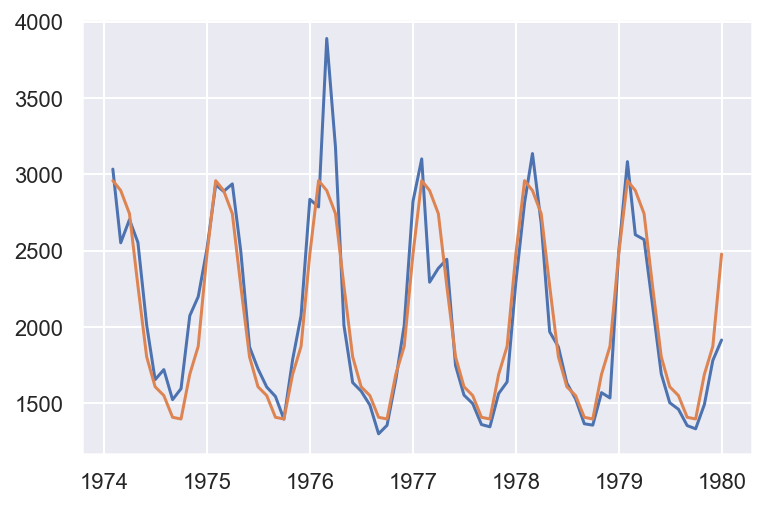

In [36]:
# 데이터 확인 및 추세 추정
display(raw.tail())
plt.plot(raw.time, raw.value)
plt.show()

display(stationarity_adf_test(raw.value, []))
display(stationarity_kpss_test(raw.value, []))

sm.tsa.graphics.plot_acf(raw.value, lags=50, use_vlines=True, title="ACF")
plt.tight_layout()
plt.show()

# C(month) : dummy 변수로 만들어서 fitting함
# -1 : y 절편을 반영하지 않겠다는 의미
result = sm.OLS.from_formula(formula='value ~ C(month) - 1',data=raw).fit()
display(result.summary())

plt.plot(raw.time, raw.value, raw.time, result.fittedvalues)
plt.show()

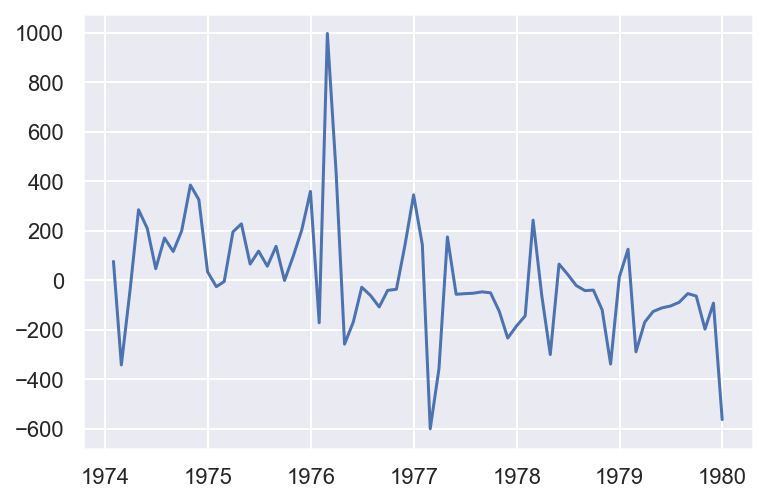

ADF:추세가 어느정도 제거되어 귀무가설(비정상)을 기각합니다.


,Stationarity_adf
Test Statistics,-5.84
p-value,0.00
Used Lag,0.00
Used Observations,71.00
Critical Value(1%),-3.53
Maximum Information Criteria,812.36


KPSS:계절성이 어느정도 남아있어 귀무가설(정상)을 기각합니다.


,Stationarity_kpss
Test Statistics,0.54
p-value,0.03
Used Lag,12.00
Critical Value(10%),0.35


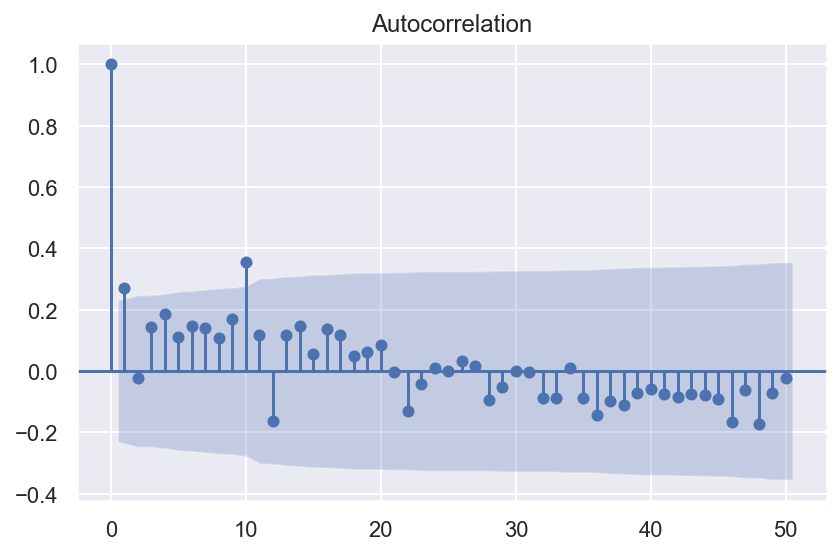

In [37]:
#추세 제거 및 정상성 확인
#방법1

plt.plot(raw.time, result.resid)
plt.show()

display(stationarity_adf_test(result.resid, []))
display(stationarity_kpss_test(result.resid, []))
sm.tsa.graphics.plot_acf(result.resid, lags=50, use_vlines=True)
plt.tight_layout()
plt.show()

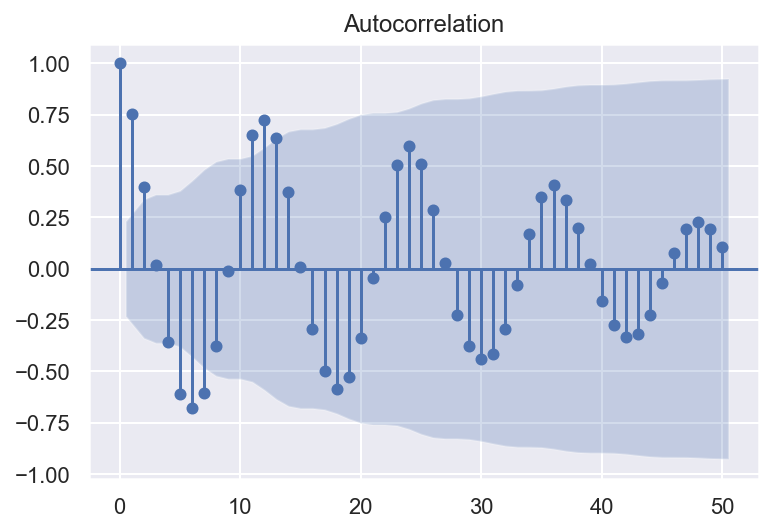

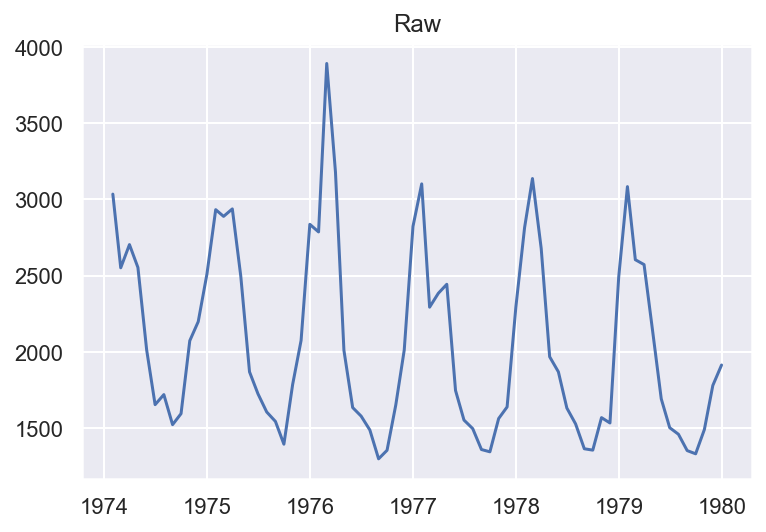

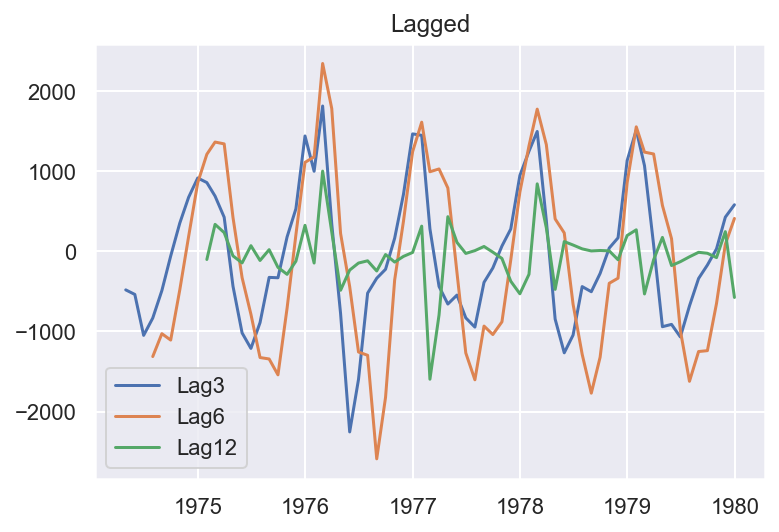

In [38]:
# 계절성 제거 및 정상성 확인
## 방법2

sm.graphics.tsa.plot_acf(raw.value, lags=50, use_vlines=True)
plt.show()

plt.plot(raw.time, raw.value)
plt.title('Raw')
plt.show()

seasonal_lag = 3
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 6
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 12  # (1 - L_12)Y_t
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
plt.title('Lagged')
plt.legend()
plt.show()

ADF:추세가 어느정도 제거되어 귀무가설(비정상)을 기각합니다.


,Stationarity_adf
Test Statistics,-4.30
p-value,0.00
Used Lag,11.00
Used Observations,54.00
Critical Value(1%),-3.56
Maximum Information Criteria,786.67


KPSS:계절성이 어느정도 제거되어 귀무가설(정상) 기각 못합니다.


,Stationarity_kpss
Test Statistics,0.35
p-value,0.10
Used Lag,11.00
Critical Value(10%),0.35


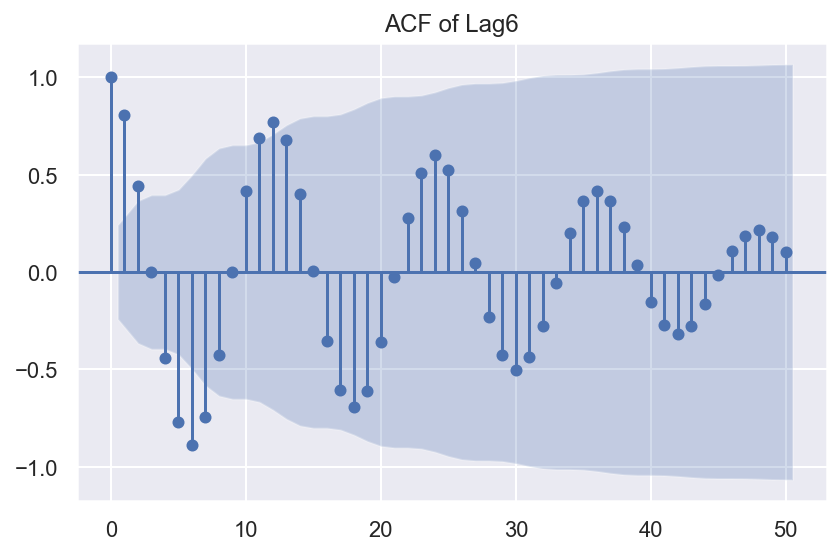

ADF:추세가 어느정도 남아있어 귀무가설(비정상) 기각 못합니다.


,Stationarity_adf
Test Statistics,-2.14
p-value,0.23
Used Lag,11.00
Used Observations,48.00
Critical Value(1%),-3.57
Maximum Information Criteria,703.72


KPSS:계절성이 어느정도 제거되어 귀무가설(정상) 기각 못합니다.


,Stationarity_kpss
Test Statistics,0.09
p-value,0.10
Used Lag,11.00
Critical Value(10%),0.35


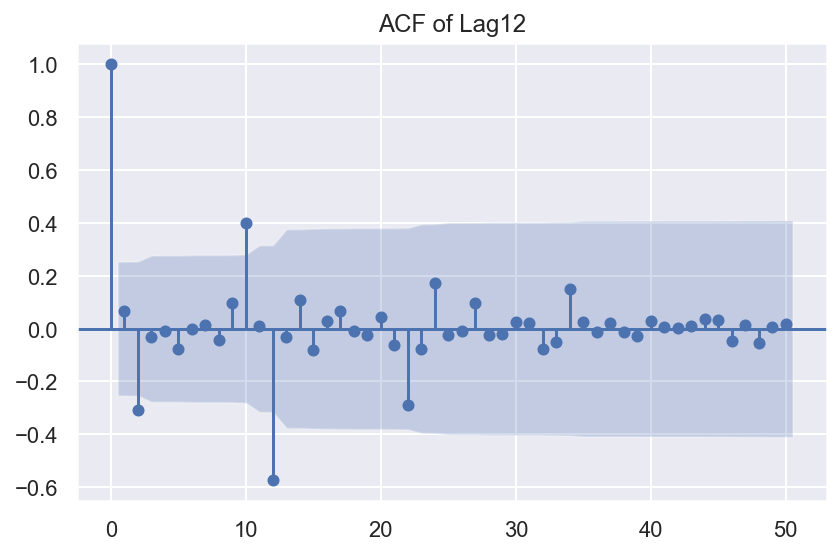

In [39]:
seasonal_lag = 6
display(stationarity_adf_test(raw.value.diff(seasonal_lag).dropna(),  []))
display(stationarity_kpss_test(raw.value.diff(seasonal_lag).dropna(),  []))
sm.graphics.tsa.plot_acf(raw.value.diff(seasonal_lag).dropna(),lags=50, use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()



seasonal_lag = 12
display(stationarity_adf_test(raw.value.diff(seasonal_lag).dropna(), []))
display(stationarity_kpss_test(raw.value.diff(seasonal_lag).dropna(), []))
sm.graphics.tsa.plot_acf(raw.value.diff(seasonal_lag).dropna(),lags=50, use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

## 랜덤워크의 정상성 변환

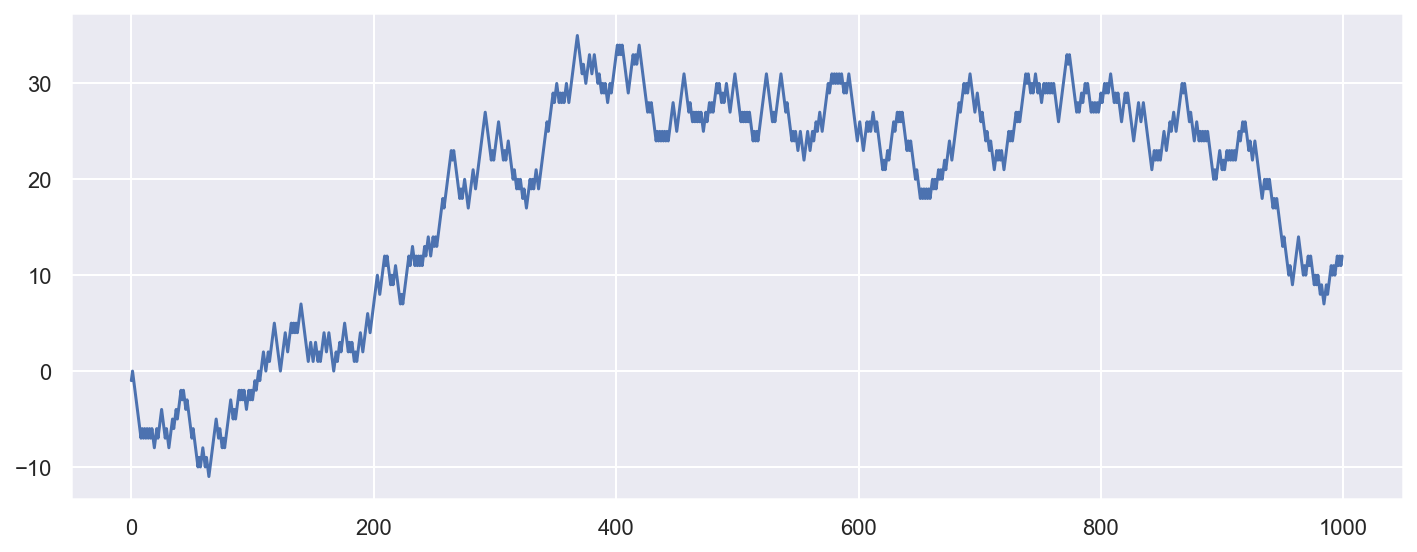

In [40]:
#랜덤워크 생성
plt.figure(figsize=(10,4))
np.random.seed(1)
random_walk = [-1 if np.random.uniform() < 0.5 else 1]
for i in range(1, 1000):
    movement = -1 if np.random.uniform() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
plt.plot(random_walk)
plt.tight_layout()
plt.show()

'Before a Difference'

ADF:추세가 어느정도 남아있어 귀무가설(비정상) 기각 못합니다.


,Stationarity_adf
Test Statistics,-1.83
p-value,0.37
Used Lag,2.00
Used Observations,997.00
Critical Value(1%),-3.44
Maximum Information Criteria,"2,766.45"


KPSS:계절성이 어느정도 남아있어 귀무가설(정상)을 기각합니다.


,Stationarity_kpss
Test Statistics,2.21
p-value,0.01
Used Lag,22.00
Critical Value(10%),0.35


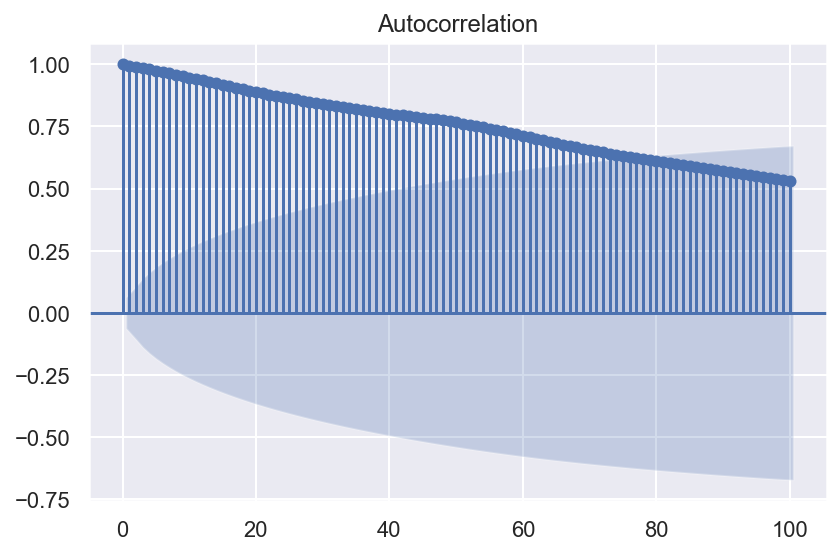

In [41]:
# 차분 전 랜덤워크 정상성 테스트
display("Before a Difference")
display(stationarity_adf_test(random_walk, []))
display(stationarity_kpss_test(random_walk, []))
sm.graphics.tsa.plot_acf(random_walk, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

'After a difference'

ADF:추세가 어느정도 제거되어 귀무가설(비정상)을 기각합니다.


,Stationarity_adf
Test Statistics,-21.11
p-value,0.00
Used Lag,1.00
Used Observations,997.00
Critical Value(1%),-3.44
Maximum Information Criteria,"2,767.13"


KPSS:계절성이 어느정도 제거되어 귀무가설(정상) 기각 못합니다.


,Stationarity_kpss
Test Statistics,0.30
p-value,0.10
Used Lag,22.00
Critical Value(10%),0.35


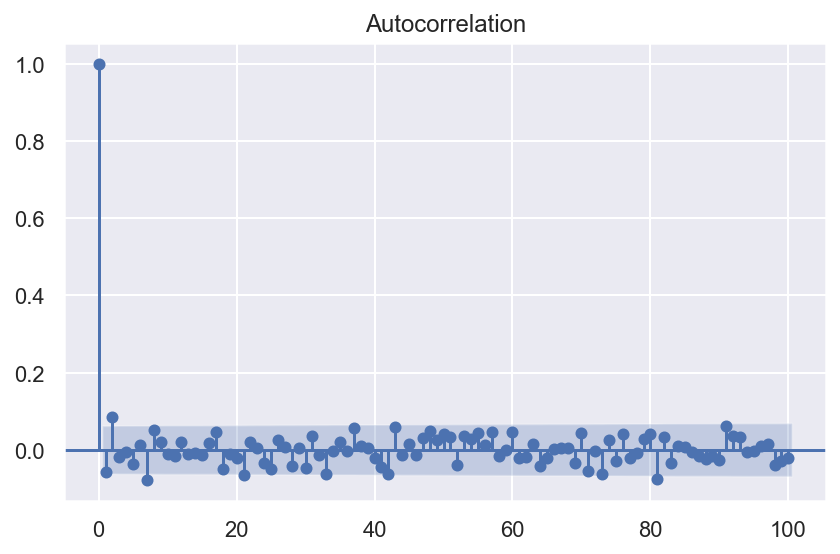

In [42]:
# 차분 후 정상성 테스트
display("After a difference")
display(stationarity_adf_test(pd.Series(random_walk).diff(1).dropna(), []))
display(stationarity_kpss_test(pd.Series(random_walk).diff(1).dropna(), []))
sm.graphics.tsa.plot_acf(pd.Series(random_walk).diff(1).dropna(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 단위근

rho : $Y_t = \rho Y_{t-1} + \epsilon_t $
- 이게 단위근임. ADF테스트 귀무가설 (단위근이 있다 -> 비정상이다)
- 1이상이면 무조건 있는 거임
- 0.9만해도 upper / lower bound가 있는걸 볼수있음 

ADF:추세가 어느정도 제거되어 귀무가설(비정상)을 기각합니다.


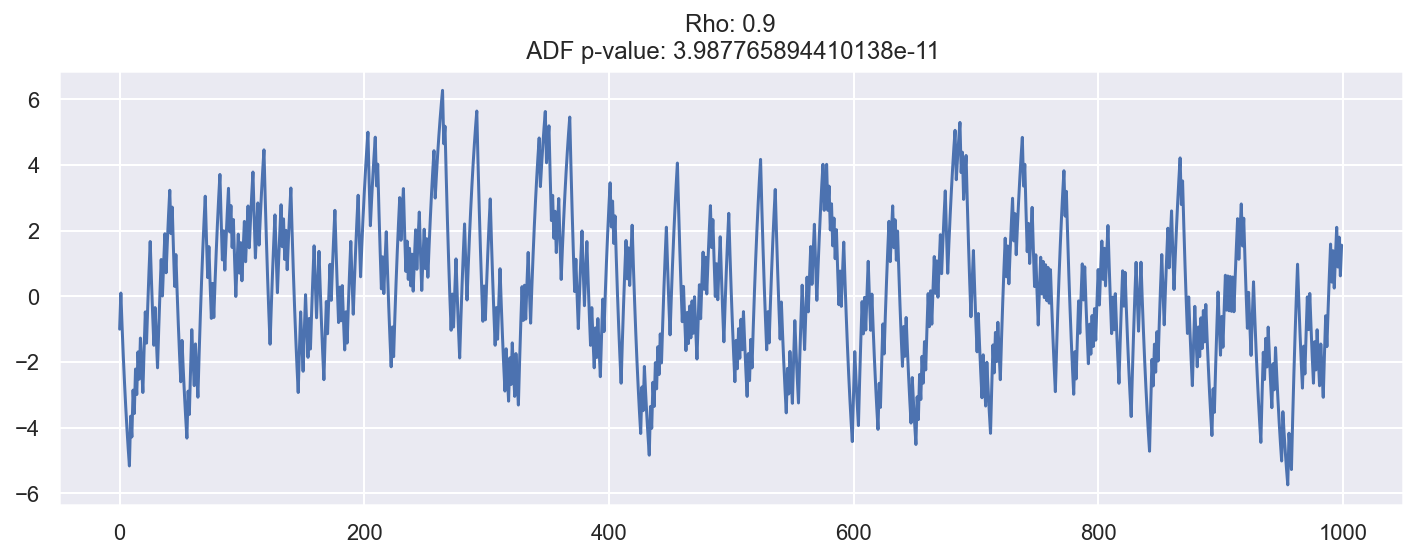

In [43]:
# 랜덤워크 데이터 생성 및 통계량 Test
plt.figure(figsize=(10, 4))
np.random.seed(1)
rho = 0.8 + 0.1  # <- 단위근.  Y_t = 
random_walk = np.array([-1 if np.random.uniform() < 0.5 else 1])
for i in range(1, 1000):
    movement = -1 if np.random.uniform() < 0.5 else 1
    random_walk = np.array(random_walk)
    value = rho * random_walk[i-1] + movement
    random_walk = list(random_walk)
    random_walk.append(value)
plt.plot(random_walk)
plt.title('Rho: {}\n ADF p-value: {}'.format(rho, np.ravel(stationarity_adf_test(random_walk, []))[1]))
plt.tight_layout()
plt.show()

# rho 값을 변화시키면서 언제 비정상이 되는지 파악?
# 정상성의 계수 범위 추론 가능!

## 항공사 승객수요 스케일 변환(Log/Box-Cox)

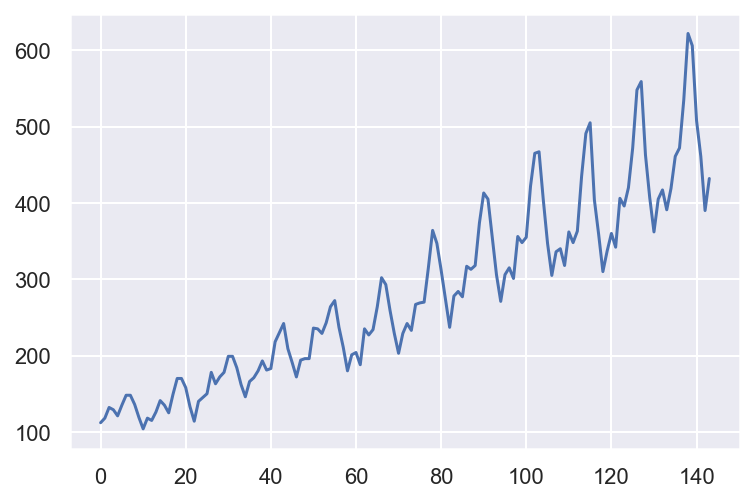

In [45]:
data = sm.datasets.get_rdataset('AirPassengers')
raw = data.data
raw.value.plot()
plt.show()

- la, lb : The lower and upper bounds for the ``lmbda`` values to pass to `boxcox
- x는 la에서 lb까지
- y는 파라미터 바꾸면서 얼마나 정규성에 도달했는지

In [47]:
x, y = sp.stats.boxcox_normplot(raw.value, la=-3, lb=3)
y_transfer, l_opt = sp.stats.boxcox(raw.value)
print("Optimal Lambda:",l_opt)

Optimal Lambda: 0.14802265137037945


- y_transfer : 정규분포로 변환된 값

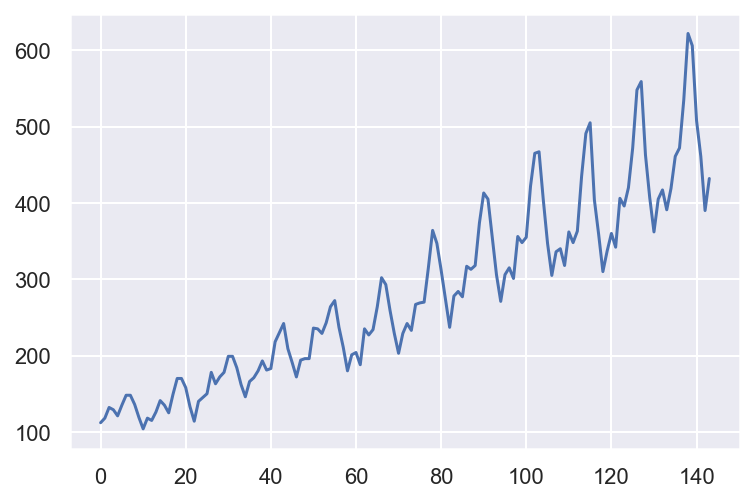

In [48]:
plt.plot(raw.value)

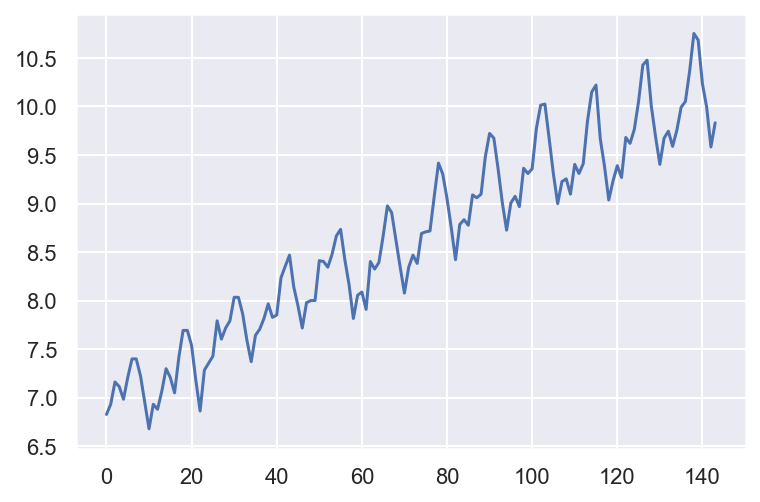

In [36]:
plt.plot(y_transfer)

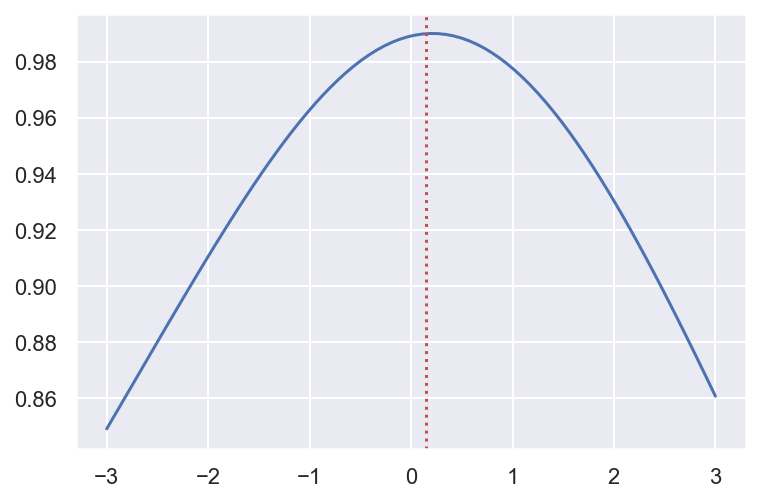

In [49]:
plt.plot(x,y)
plt.axvline(x=l_opt, color='r',ls=':')
plt.show()

- QQ Plot : 정규성을 검토해주는 plot.

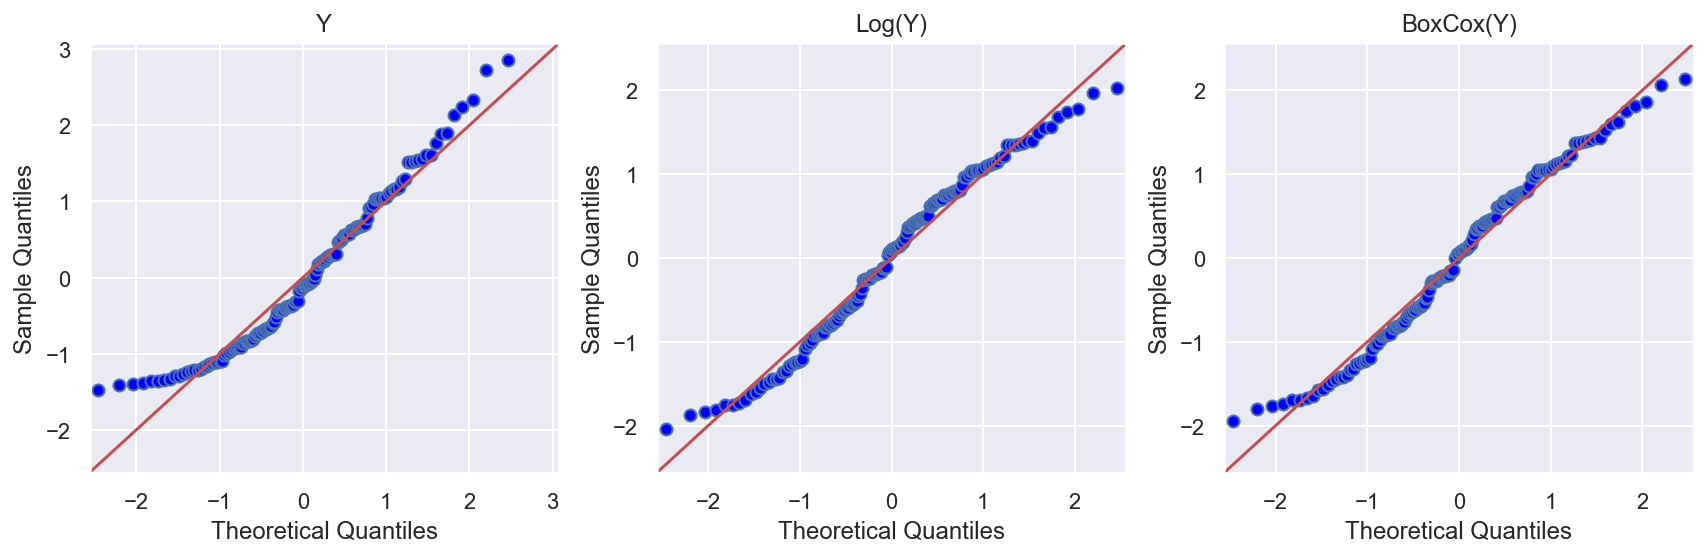

In [50]:
plt.figure(figsize=(12,4))
sm.qqplot(raw.value, fit=True, line='45', ax=plt.subplot(131))
plt.title('Y')
sm.qqplot(np.log(raw.value), fit=True, line='45', ax=plt.subplot(132))
plt.title('Log(Y)')
sm.qqplot(y_transfer, fit=True, line='45', ax=plt.subplot(133))
plt.title("BoxCox(Y)")
plt.tight_layout()
plt.show()

## 종합 : 항공사 승객수요 정상성 변환

In [51]:
data = sm.datasets.get_rdataset('AirPassengers')
raw = data.data

if 'time' in raw.columns:
    raw.index = pd.date_range(start='1/1/1949', periods=len(raw['time']), freq='M')
    del raw['time']

In [52]:
raw

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


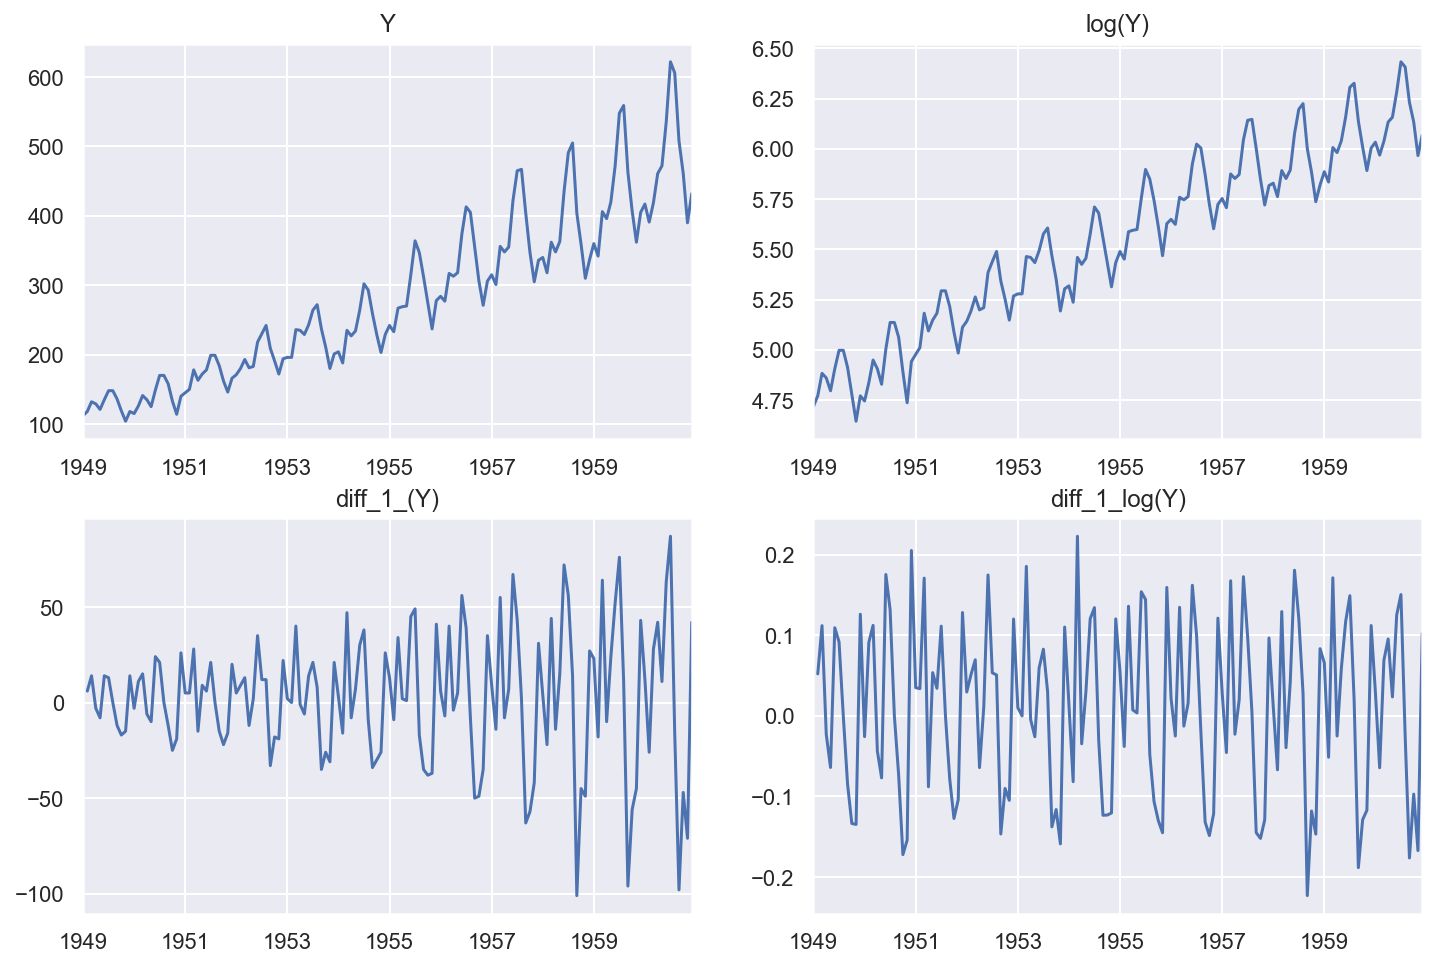

In [53]:
#정상성 확보
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
raw.diff(1).plot(ax=plt.subplot(223), title='diff_1_(Y)', legend=False)
np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff_1_log(Y)', legend=False)
plt.show()

### 미변환

'Non-transfer'

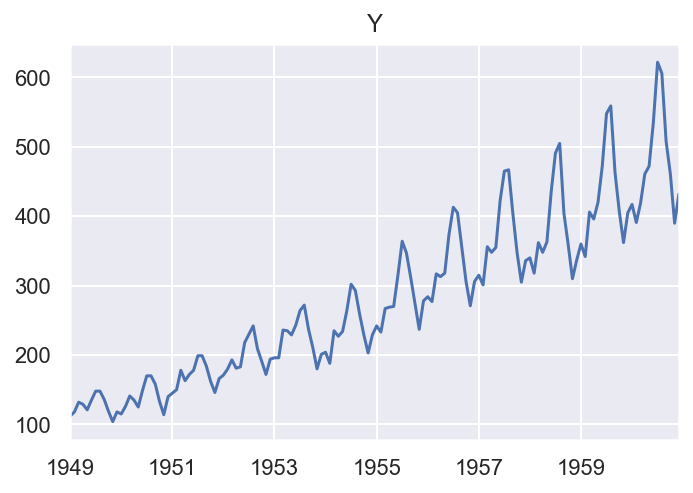

ADF:추세가 어느정도 남아있어 귀무가설(비정상) 기각 못합니다.


,Stationarity_adf
Test Statistics,0.82
p-value,0.99
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,996.69


KPSS:계절성이 어느정도 남아있어 귀무가설(정상)을 기각합니다.


,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00
Critical Value(10%),0.35


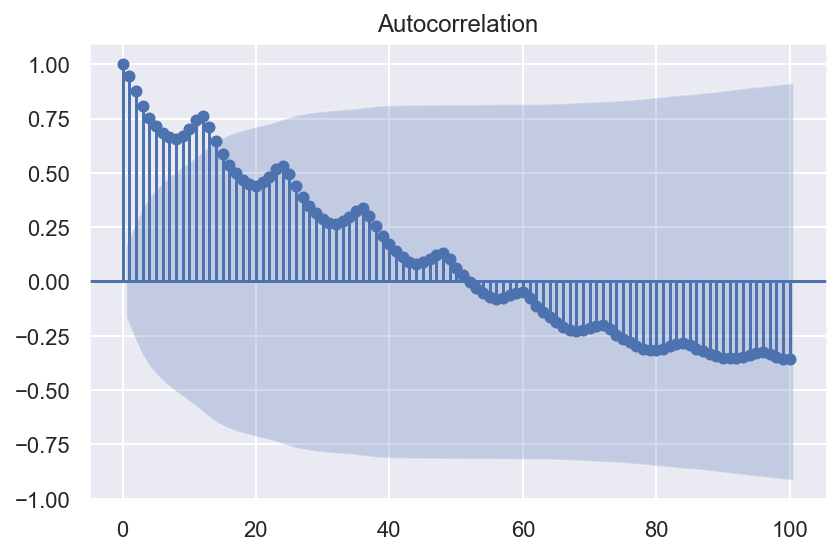

In [54]:
display('Non-transfer')
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(222), title='Y', legend=False)
plt.show()

candidate_none = raw.copy()
display(stationarity_adf_test(candidate_none.values, []))
display(stationarity_kpss_test(candidate_none.values, []))
sm.graphics.tsa.plot_acf(candidate_none, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 로그변환 : 시간에 다른 분산 일정히

'Log transfer:'

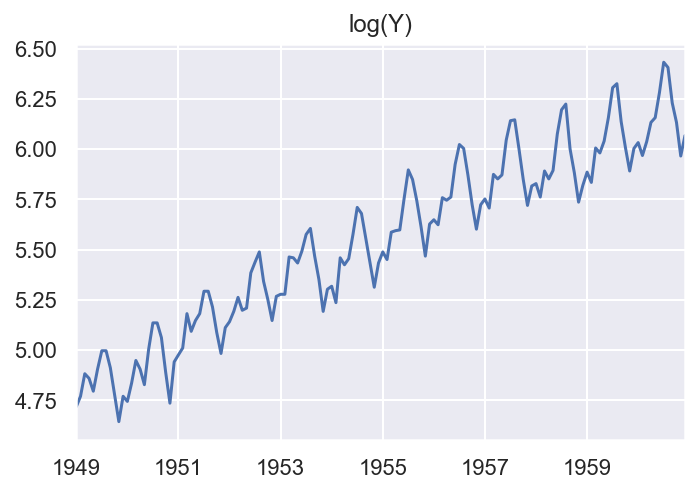

ADF:추세가 어느정도 남아있어 귀무가설(비정상) 기각 못합니다.


,Stationarity_adf
Test Statistics,-1.72
p-value,0.42
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,-445.40


KPSS:계절성이 어느정도 남아있어 귀무가설(정상)을 기각합니다.


,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00
Critical Value(10%),0.35


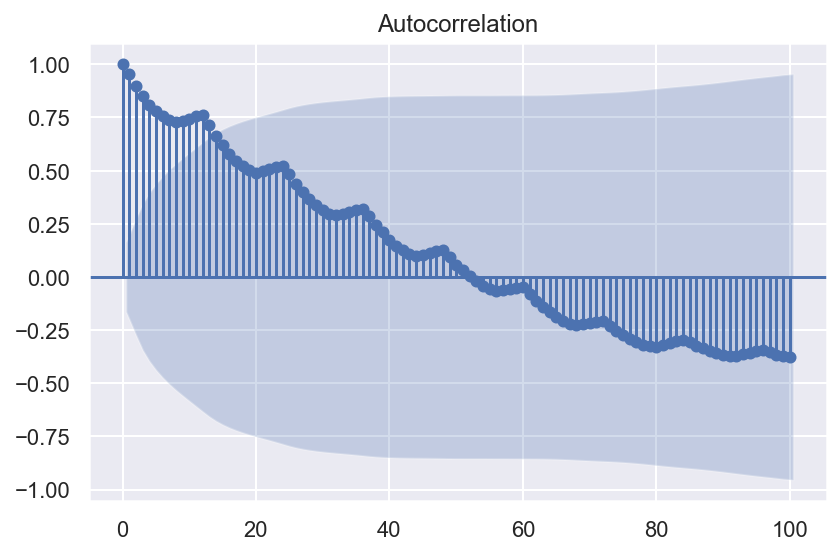

In [56]:
display('Log transfer:')
plt.figure(figsize=(12,8))
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
plt.show()

candidate_trend = np.log(raw).copy()
display(stationarity_adf_test(candidate_trend.values.flatten(), []))
display(stationarity_kpss_test(candidate_trend.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_trend, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()


In [57]:
trend_diff_order_initial = 0
result = stationarity_adf_test(candidate_trend.values.flatten(), []).T
if result['p-value'].values.flatten() < 0.05:
    trend_diff_order = trend_diff_order_initial
else:
    trend_diff_order = trend_diff_order_initial + 1
print('Trend Difference: ', trend_diff_order)

ADF:추세가 어느정도 남아있어 귀무가설(비정상) 기각 못합니다.
Trend Difference:  1


### 로그 + 추세차분

'Log and trend diffrence transfer:'

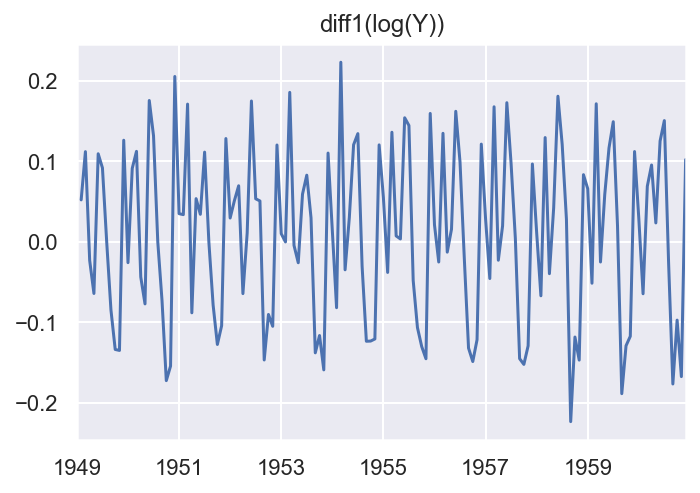

ADF:추세가 어느정도 남아있어 귀무가설(비정상) 기각 못합니다.


,Stationarity_adf
Test Statistics,-2.72
p-value,0.07
Used Lag,14.00
Used Observations,128.00
Critical Value(1%),-3.48
Maximum Information Criteria,-440.36


KPSS:계절성이 어느정도 제거되어 귀무가설(정상) 기각 못합니다.


,Stationarity_kpss
Test Statistics,0.10
p-value,0.10
Used Lag,14.00
Critical Value(10%),0.35


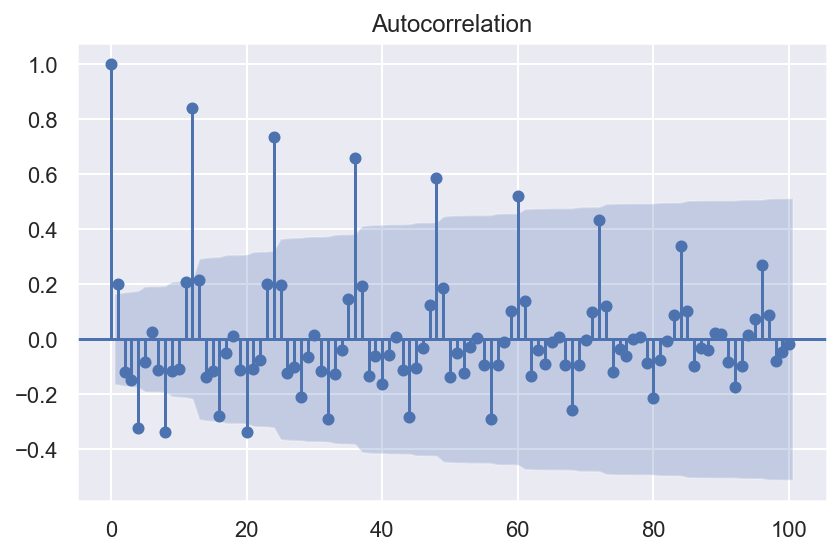

In [58]:
display('Log and trend diffrence transfer:')
plt.figure(figsize=(12,8))
np.log(raw).diff(trend_diff_order).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

candidate_seasonal = candidate_trend.diff(trend_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_seasonal.values.flatten(), []))
display(stationarity_kpss_test(candidate_seasonal.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_seasonal, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 로그 + 추세차분(한번더)

'Log and trend diffrence transfer * 2:'

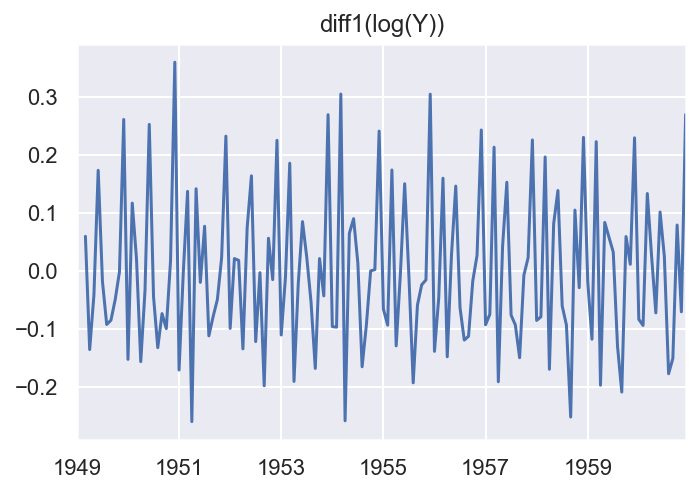

ADF:추세가 어느정도 제거되어 귀무가설(비정상)을 기각합니다.


,Stationarity_adf
Test Statistics,-8.20
p-value,0.00
Used Lag,13.00
Used Observations,128.00
Critical Value(1%),-3.48
Maximum Information Criteria,-430.89


KPSS:계절성이 어느정도 제거되어 귀무가설(정상) 기각 못합니다.


,Stationarity_kpss
Test Statistics,0.06
p-value,0.10
Used Lag,14.00
Critical Value(10%),0.35


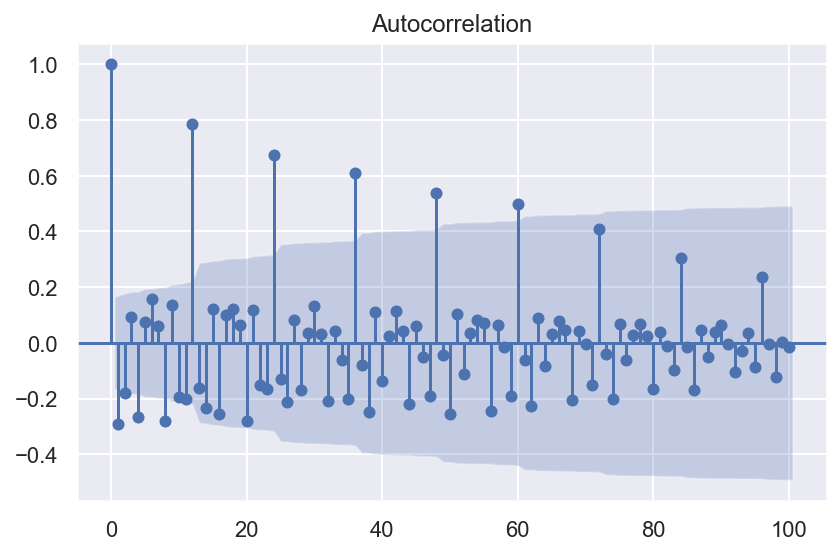

In [59]:
display('Log and trend diffrence transfer * 2:')
plt.figure(figsize=(12,8))
np.log(raw).diff(trend_diff_order).diff(trend_diff_order).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

test_log_diff2 = candidate_seasonal.diff(1).dropna().copy()
display(stationarity_adf_test(test_log_diff2.values.flatten(), []))
display(stationarity_kpss_test(test_log_diff2.values.flatten(), []))
sm.graphics.tsa.plot_acf(test_log_diff2, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 로그 + 추세차분**1 + 계절차분 변환

In [70]:
print(sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1)
seasonal_diff_order = sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1
seasonal_diff_order = np.int(seasonal_diff_order)
print("Seasonal Difference: ", seasonal_diff_order)

12
Seasonal Difference:  12


'Log and trend+seasonal diffrence transfer:'

ADF:추세가 어느정도 제거되어 귀무가설(비정상)을 기각합니다.


,Stationarity_adf
Test Statistics,-4.44
p-value,0.00
Used Lag,12.00
Used Observations,118.00
Critical Value(1%),-3.49
Maximum Information Criteria,-415.56


KPSS:계절성이 어느정도 제거되어 귀무가설(정상) 기각 못합니다.


,Stationarity_kpss
Test Statistics,0.11
p-value,0.10
Used Lag,13.00
Critical Value(10%),0.35


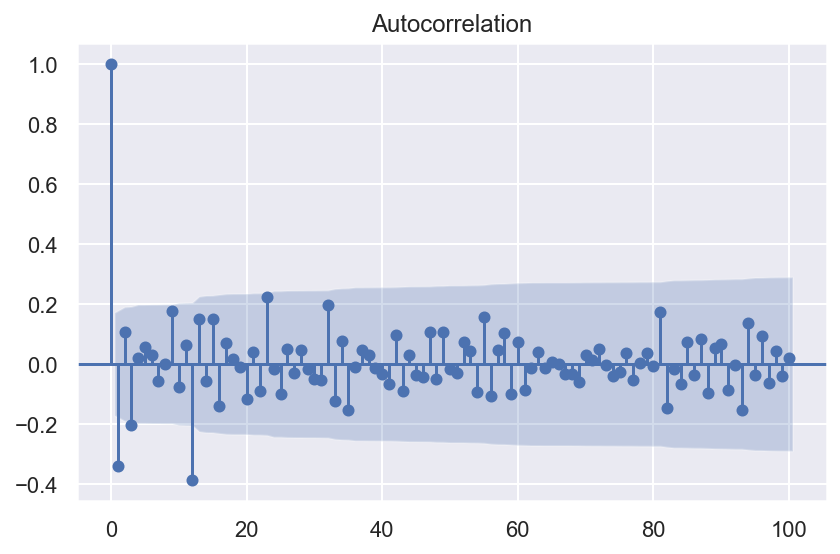

In [71]:
display('Log and trend+seasonal diffrence transfer:')
candidate_final = candidate_seasonal.diff(seasonal_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_final.values.flatten(), []))
display(stationarity_kpss_test(candidate_final.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_final, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 로그 + 추세차분**2 + 계절차분 변환

In [75]:
print(sm.tsa.acf(test_log_diff2)[1:].argmax() + 1)
seasonal_diff_order = sm.tsa.acf(test_log_diff2)[1:].argmax() + 1
seasonal_diff_order = np.int(seasonal_diff_order)
print("Seasonal Difference: ", seasonal_diff_order)

12
Seasonal Difference:  12


'Log and trend+seasonal diffrence transfer:'

ADF:추세가 어느정도 제거되어 귀무가설(비정상)을 기각합니다.


,Stationarity_adf
Test Statistics,-4.30
p-value,0.00
Used Lag,10.00
Used Observations,119.00
Critical Value(1%),-3.49
Maximum Information Criteria,-394.73


KPSS:계절성이 어느정도 제거되어 귀무가설(정상) 기각 못합니다.


,Stationarity_kpss
Test Statistics,0.06
p-value,0.10
Used Lag,13.00
Critical Value(10%),0.35


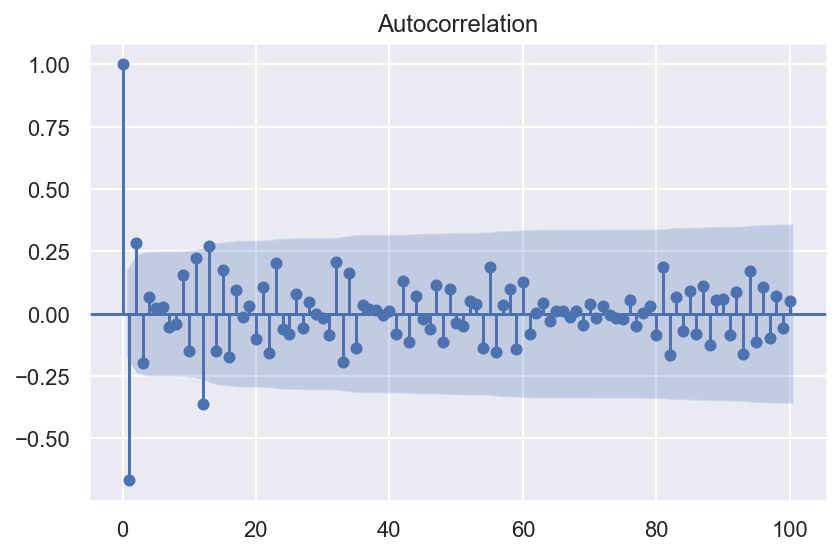

In [76]:
display('Log and trend+seasonal diffrence transfer:')
candidate_final = test_log_diff2.diff(seasonal_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_final.values.flatten(), []))
display(stationarity_kpss_test(candidate_final.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_final, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()